In [64]:
# Importacion de librerias y de visualizacion (matplotlib y seaborn)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

%matplotlib inline

plt.style.use('default') # para graficos matplotlib
plt.rcParams['figure.figsize'] = (10, 8)

sns.set(style="whitegrid") # grid seaborn

pd.options.display.float_format = '{:20,.3f}'.format # notacion output

# Acceso a set de datos

In [2]:
path = "/home/seba/Escritorio/Datos/TP1/data/"
df_props_full = pd.read_csv(path + "train.csv")

# Conversión de tipos

In [3]:
df_props_full['fecha'] = pd.to_datetime(df_props_full['fecha'])

In [4]:
# Convierto todos los valores 1/0 a uint8
df_props_full['gimnasio'] = df_props_full['gimnasio'].astype('uint8')
df_props_full['usosmultiples'] = df_props_full['usosmultiples'].astype('uint8')
df_props_full['piscina'] = df_props_full['piscina'].astype('uint8')
df_props_full['escuelascercanas'] = df_props_full['escuelascercanas'].astype('uint8')
df_props_full['centroscomercialescercanos'] = df_props_full['centroscomercialescercanos'].astype('uint8')

In [5]:
# Convierto los representables en uint8. Utilizo el tipo de pandas UInt8Dtype para evitar conflicto con NaN
df_props_full['antiguedad'] = df_props_full['antiguedad'].astype(pd.UInt8Dtype())
df_props_full['habitaciones'] = df_props_full['habitaciones'].astype(pd.UInt8Dtype())
df_props_full['garages'] = df_props_full['garages'].astype(pd.UInt8Dtype())
df_props_full['banos'] = df_props_full['banos'].astype(pd.UInt8Dtype())

In [6]:
# Convierto los representables en uint16. Utilizo el tipo de pandas UInt16Dtype para evitar conflicto con NaN
df_props_full['metroscubiertos'] = df_props_full['metroscubiertos'].astype(pd.UInt16Dtype())
df_props_full['metrostotales'] = df_props_full['metrostotales'].astype(pd.UInt16Dtype())

In [7]:
# Convierto los representables en uint32. Utilizo el tipo de pandas UInt32Dtype para evitar conflicto con NaN
df_props_full['id'] = df_props_full['id'].astype(pd.UInt32Dtype())
df_props_full['idzona'] = df_props_full['idzona'].astype(pd.UInt32Dtype())
df_props_full['precio'] = df_props_full['precio'].astype(pd.UInt32Dtype())

# Analisis Fechas Publicaciones

In [8]:
df_props_full['year'] = df_props_full['fecha'].dt.year
df_props_full['month'] = df_props_full['fecha'].dt.month

<span style="color:green">first_fortnight va a tomar el valor 1 si es la primer quincena del mes, 0 si la segunda

In [9]:
df_props_full['first_fortnight'] = df_props_full['fecha'].apply(lambda fecha: 1 if fecha.day < 15 else 0)

In [10]:
df_props_full.groupby('first_fortnight').agg('size').to_frame()

,0
first_fortnight,
0,125186
1,114814


# Conversion MEX a USD

Utilizo un csv con información sobre el valor del dolar en México día a día a partir del 12/12/2011 hasta el 31/01/2017. La conversión del Peso Mexicano a Dolares se hace con el valor del dolar en la fecha de la publicación.
Link Datos: https://mx.investing.com/currencies/usd-mxn-converter#historical_data_converter

In [11]:
df_dollar = pd.read_csv(path + 'dollar.csv')
print(df_dollar.dtypes)
print('\n')
print(df_dollar.shape)
df_dollar.head(2)

Fecha       object
Cierre      object
Apertura    object
Máximo      object
Mínimo      object
% var.      object
dtype: object


(1344, 6)


,Fecha,Cierre,Apertura,Máximo,Mínimo,% var.
0,12.12.2011,0.07240,0.07350,0.07360,0.07200,-1.63
1,13.12.2011,0.07210,0.07240,0.07280,0.07190,-0.41


In [12]:
# Con describe identifico si hay valores nulos
df_dollar.describe()

,Fecha,Cierre,Apertura,Máximo,Mínimo,% var.
count,1342,1343,1343,1343,1343,1343
unique,1342,312,316,316,301,280
top,17.12.2013,0.07680,0.07640,0.07670,0.07660,0.00
freq,1,23,25,24,25,117


In [13]:
# Muestro las lineas con valores nulos
df_dollar[df_dollar.isna().any(axis=1)]

,Fecha,Cierre,Apertura,Máximo,Mínimo,% var.
1342,NaN,NaN,NaN,NaN,NaN,NaN
1343,NaN,Máximo:0.08380,Mínimo:0.04540,Diferencia:0.03840,Promedio:0.06895,% var.:-34.78261


In [14]:
# Analiso los últimos registros
df_dollar.loc[1340:1343]

,Fecha,Cierre,Apertura,Máximo,Mínimo,% var.
1340,30.01.2017,0.04810,0.04790,0.04840,0.04780,0.63
1341,31.01.2017,0.04800,0.04810,0.04840,0.04780,-0.21
1342,NaN,NaN,NaN,NaN,NaN,NaN
1343,NaN,Máximo:0.08380,Mínimo:0.04540,Diferencia:0.03840,Promedio:0.06895,% var.:-34.78261


Elimino las últimas dos filas, donde la anteúltima funciona como separador y la última es un analisis global de los datos

In [15]:
df_dollar = df_dollar.dropna()
df_dollar.describe()

,Fecha,Cierre,Apertura,Máximo,Mínimo,% var.
count,1342,1342,1342,1342,1342,1342
unique,1342,311,315,315,300,279
top,17.12.2013,0.07680,0.07640,0.07670,0.07660,0.00
freq,1,23,25,24,25,117


In [16]:
df_dollar['Cierre'] = pd.to_numeric(df_dollar['Cierre'])
df_dollar['Cierre'] = df_dollar['Cierre'].round(3)
df_dollar['Fecha'] = pd.to_datetime(df_dollar['Fecha'], format='%d.%m.%Y')
df_dollar = df_dollar.set_index('Fecha')
df_dollar = df_dollar.loc[:, 'Cierre'].to_frame()

In [17]:
# Rango de fechas
print(df_dollar.index.min())
print(df_dollar.index.max())

2011-12-12 00:00:00
2017-01-31 00:00:00


In [18]:
# Agrego fechas faltantes (Sabados y Domingos) con valor 0
idx = pd.date_range(start='2011-12-12', end='2017-01-31')
df_dollar = df_dollar.reindex(idx, fill_value=0)

In [19]:
df_dollar.head(8)

,Cierre
2011-12-12,0.072
2011-12-13,0.072
2011-12-14,0.072
2011-12-15,0.072
2011-12-16,0.072
2011-12-17,0.000
2011-12-18,0.000
2011-12-19,0.072


In [20]:
# Cuando se trata de una fecha que corresponde a un Sabado o Domingo no se tiene infromación sobre Cierre
# Le asigno el valor correspondiente al Viernes previo
for i in range(0, len(df_dollar)):
    if (df_dollar.iloc[i]['Cierre'] == 0):
        df_dollar.iloc[i]['Cierre'] = df_dollar.iloc[i-1]['Cierre']

In [21]:
df_dollar.head(8)

,Cierre
2011-12-12,0.072
2011-12-13,0.072
2011-12-14,0.072
2011-12-15,0.072
2011-12-16,0.072
2011-12-17,0.072
2011-12-18,0.072
2011-12-19,0.072


In [22]:
price_dates = df_props_full.loc[:,['fecha','precio','year','month','first_fortnight']]
price_dates['fecha'] = price_dates['fecha'].apply(lambda x: x.replace(hour=0, minute=0, second=0)) # Seteo tiempo a 00:00:00 para join
price_dates = price_dates.set_index('fecha')
price_dates = price_dates.join(df_dollar, how='left')
price_dates = price_dates.reset_index()
price_dates.rename(columns = {'index' : 'fecha'}, inplace=True)
price_dates.describe()

,precio,year,month,first_fortnight,Cierre
count,"240,000.000","240,000.000","240,000.000","240,000.000","240,000.000"
mean,"2,530,838.346","2,014.675",7.441,0.478,0.064
std,"2,152,551.798",1.358,3.563,0.500,0.011
min,"310,000.000","2,012.000",1.000,0.000,0.048
25%,"952,772.500","2,014.000",4.000,0.000,0.054
50%,"1,850,000.000","2,015.000",8.000,0.000,0.063
75%,"3,390,000.000","2,016.000",11.000,1.000,0.076
max,"12,525,000.000","2,016.000",12.000,1.000,0.084


In [23]:
price_dates.rename(columns = {'Cierre' : 'MEX_to_USD', 'precio' : 'Precio_MEX'}, inplace=True)
price_dates.head()

,fecha,Precio_MEX,year,month,first_fortnight,MEX_to_USD
0,2012-01-01,950000,2012,1,1,0.072
1,2012-01-01,970000,2012,1,1,0.072
2,2012-01-01,6500000,2012,1,1,0.072
3,2012-01-01,3590000,2012,1,1,0.072
4,2012-01-01,1120000,2012,1,1,0.072


In [24]:
price_dates['Precio_USD'] = price_dates['Precio_MEX'] * price_dates['MEX_to_USD']
price_dates['Precio_USD'] = price_dates['Precio_USD'].astype(int)
price_dates.head()

,fecha,Precio_MEX,year,month,first_fortnight,MEX_to_USD,Precio_USD
0,2012-01-01,950000,2012,1,1,0.072,68400
1,2012-01-01,970000,2012,1,1,0.072,69840
2,2012-01-01,6500000,2012,1,1,0.072,467999
3,2012-01-01,3590000,2012,1,1,0.072,258479
4,2012-01-01,1120000,2012,1,1,0.072,80640


# Analisis Palabras Titulo

## Titulos más utilizados

In [25]:
words_titulo = df_props_full['titulo'].to_frame()
words_titulo = words_titulo['titulo'].str.lower().to_frame()

In [26]:
words_titulo = words_titulo.dropna()
words_titulo = words_titulo.groupby('titulo').agg({'titulo':'count'})
words_titulo.index.names = ['index']

In [27]:
words_titulo.rename(columns = {'titulo' : 'appearences'}, inplace=True)
words_titulo = words_titulo.reset_index()
words_titulo.rename(columns = {'index' : 'titulo'}, inplace=True)

Importo nltk con la cual puedo realizar un split de los titulos y al mismo tiempo eliminar caracteres invisibles

In [28]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/seba/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [29]:
words_titulo['token'] = words_titulo['titulo'].apply(nltk.word_tokenize)
words_titulo.head()

,titulo,appearences,token
0,\ta5,1,[a5]
1,\tanana,1,[anana]
2,\tceos 3n,1,"[ceos, 3n]"
3,\tdiamante,1,[diamante]
4,\tdiamante roof garden,2,"[diamante, roof, garden]"


### Trigramas

In [30]:
# Retorna una lista de los trigramas generados a partir de la serie
def trigrams_list(x):
    return list(nltk.ngrams(x,3))

In [31]:
words_titulo['trigrams'] = words_titulo['token'].apply(trigrams_list)
words_titulo.head(20)

,titulo,appearences,token,trigrams
0,\ta5,1,[a5],[]
1,\tanana,1,[anana],[]
2,\tceos 3n,1,"[ceos, 3n]",[]
3,\tdiamante,1,[diamante],[]
4,\tdiamante roof garden,2,"[diamante, roof, garden]","[(diamante, roof, garden)]"
5,\texelente casa habitacion,1,"[exelente, casa, habitacion]","[(exelente, casa, habitacion)]"
6,,2,[],[]
7,\tcasa por audiorio/av tabachines y federalismo,1,"[casa, por, audiorio/av, tabachines, y, federa...","[(casa, por, audiorio/av), (por, audiorio/av, ..."
8,,3,[],[]
9,...,1,"[casa, en, renta]","[(casa, en, renta)]"


In [32]:
trigrams = pd.Series([trigram for title_trigrams in words_titulo['trigrams'] for trigram in title_trigrams])
trigrams = trigrams.rename('trigram')
trigrams = trigrams.to_frame()
trigrams.head()

,trigram
0,"(diamante, roof, garden)"
1,"(exelente, casa, habitacion)"
2,"(casa, por, audiorio/av)"
3,"(por, audiorio/av, tabachines)"
4,"(audiorio/av, tabachines, y)"


In [33]:
trigrams = trigrams.groupby('trigram').agg('size')

trigrams = trigrams.to_frame()

trigrams.columns = ['appearences']
trigrams = trigrams.sort_values('appearences',ascending=False)

In [34]:
trigrams = trigrams.reset_index()

In [35]:
trigrams['trigram'] = trigrams['trigram'].str.join(",")
trigrams['trigram'] = trigrams['trigram'].str.replace(r'\,',' ')

In [36]:
trigrams.head(20)

,trigram,appearences
0,casa en venta,28237
1,en venta en,26937
2,departamento en venta,7778
3,! ! !,4776
4,en venta,4350
5,casa en condominio,3589
6,hermosa casa en,3312
7,venta de casa,2787
8,bonita casa en,2314
9,de casa en,2188


### Palabras Individualmente

In [37]:
# Retorna una lista de las palabras en la serie
def words_list(x):
    return list(nltk.ngrams(x,1))

In [38]:
words_titulo['words'] = words_titulo['token'].apply(words_list)
words = pd.Series([word for title_words in words_titulo['words'] for word in title_words])
words = words.rename('words')
words = words.to_frame()

In [39]:
words = words.groupby('words').agg('size')
words = words.to_frame()
words.columns = ['appearences']
words = words.sort_values('appearences',ascending=False)

In [40]:
words = words.reset_index()
words['words'] = words['words'].str.join(",")

In [41]:
# Conservo palabras con 4 o  mas caracteres
words = words.loc[words['words'].apply(lambda x: len(x) > 3)]

In [42]:
# Creo diccionario: Palabra:Frequencia
words_dicc = dict(zip(words['words'], words['appearences']))

In [43]:
# Cantidad de palabras
len(words_dicc)

34442

In [44]:
from wordcloud import WordCloud

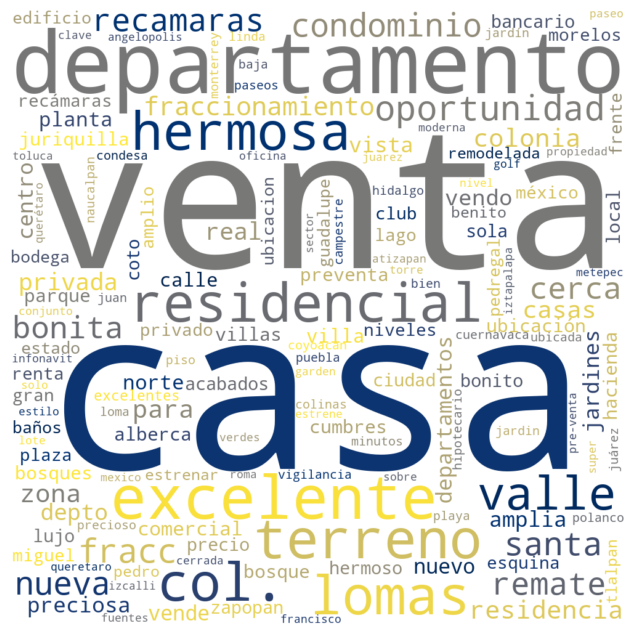

In [68]:
# Utilizo los 150 terminos con mayor frecuencia
wordcloud = WordCloud(background_color="white", width=1000, height=1000, colormap='cividis', max_words=150).generate_from_frequencies(frequencies=words_dicc)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Analisis Palabras Descripcion

In [46]:
words_desc = df_props_full['descripcion'].to_frame()
words_desc = words_desc['descripcion'].str.lower().to_frame()

In [47]:
words_desc = words_desc.dropna()
words_desc = words_desc.groupby('descripcion').agg({'descripcion':'count'})
words_desc.index.names = ['index']

In [48]:
words_desc.rename(columns = {'descripcion' : 'appearences'}, inplace=True)
words_desc = words_desc.reset_index()
words_desc.rename(columns = {'index' : 'descripcion'}, inplace=True)

In [49]:
words_desc.head()

,descripcion,appearences
0,\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,1
1,\t\t\t\t\t\t\t\t\t\t\n\tpatio trasero.\npa: 3 ...,1
2,\t\t\t\t\t\t\t\t \t \t \t \testa propiedad est...,1
3,\t\t\t\t \t \tubicada sobre playa.seguridad la...,1
4,"\t\t \tcasa construida en dos niveles, la remo...",1


Descripcion ésta en código html asi que debo eliminar sus tags

In [50]:
#Utilizo una expresion regular para borrar el texto dentro de tags html
import re

def cleanhtml(descripcion_html):
    cleanr = re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    descripcion_txt = re.sub(cleanr, '', descripcion_html)
    return descripcion_txt

In [51]:
words_desc['descripcion'] = words_desc['descripcion'].apply(cleanhtml)

Utilizo unidecode para eliminar acentuacion en las descripciones

In [52]:
import unidecode

In [53]:
# Elimino acentuacion
words_desc['descripcion'] = words_desc['descripcion'].apply(unidecode.unidecode)

In [54]:
words_desc['token'] = words_desc['descripcion'].apply(nltk.word_tokenize)
words_desc.head()

,descripcion,appearences,token
0,\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t\t...,1,"[ubicada, sobre, calle.con, vista, a, la, bahi..."
1,\t\t\t\t\t\t\t\t\t\t\n\tpatio trasero.\npa: 3 ...,1,"[patio, trasero, ., pa, :, 3, recamaras, y, 1,..."
2,\t\t\t\t\t\t\t\t \t \t \t \testa propiedad est...,1,"[esta, propiedad, esta, totalmente, en, regla,..."
3,\t\t\t\t \t \tubicada sobre playa.seguridad la...,1,"[ubicada, sobre, playa.seguridad, las, 24, hrs..."
4,"\t\t \tcasa construida en dos niveles, la remo...",1,"[casa, construida, en, dos, niveles, ,, la, re..."


### Palabras Individualmente

In [55]:
# Retorna una lista de las palabras en la serie
def words_list(x):
    return list(nltk.ngrams(x,1))

In [56]:
words_desc['words'] = words_desc['token'].apply(words_list)
words_desc_apps = pd.Series([word for desc_words in words_desc['words'] for word in desc_words])
words_desc_apps = words_desc_apps.rename('words')
words_desc_apps = words_desc_apps.to_frame()

In [57]:
words_desc_apps = words_desc_apps.groupby('words').agg('size')
words_desc_apps = words_desc_apps.to_frame()
words_desc_apps.columns = ['appearences']
words_desc_apps = words_desc_apps.sort_values('appearences',ascending=False)

In [58]:
words_desc_apps = words_desc_apps.reset_index()
words_desc_apps['words'] = words_desc_apps['words'].str.join(",")

In [59]:
# Conservo palabras con 4 o  mas caracteres
words_desc_apps = words_desc_apps.loc[words_desc_apps['words'].apply(lambda x: len(x) > 3)]

In [60]:
# Creo diccionario: Palabra:Frequencia
words_desc_dicc = dict(zip(words_desc_apps['words'], words_desc_apps['appearences']))

In [61]:
#Elimino para que quedo con más repeticiones
words_desc_dicc.pop('para')
#Corrijo 'ñ' eliminada de palabras principales
words_desc_dicc['baño'] = words_desc_dicc.pop('bano')
words_desc_dicc['baños'] = words_desc_dicc.pop('banos')

In [62]:
# Cantidad de palabras
len(words_desc_dicc)

150023

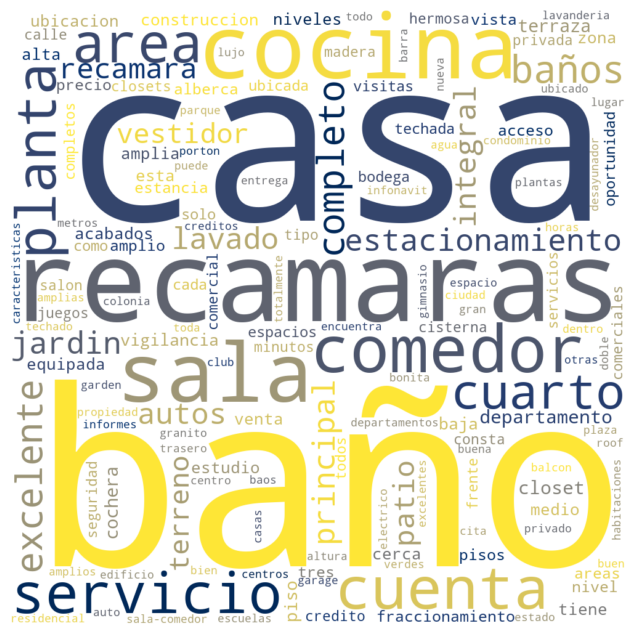

In [73]:
# Utilizo los 150 terminos con mayor frecuencia
wordcloud = WordCloud(background_color="white", width=1000, height=1000, colormap='cividis', max_words=150).generate_from_frequencies(frequencies=words_desc_dicc)
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()